In [1]:
import pandas as pd
import numpy as np
import numpy as np

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

ModuleNotFoundError: No module named 'torch'

# Load Data

In [2]:
df_cracks = pd.read_csv('/home/thmegy/Téléchargements/import_ai4cracks_200_CD33.csv', sep=';')

In [3]:
df_cracks['id'] = df_cracks['route']+'_'+df_cracks['plo_debut']+'_'+\
                df_cracks['abs_debut'].astype('str')+'_'+df_cracks['plo_fin']+'_'+\
                df_cracks['abs_fin'].astype('str')

In [4]:
df_note = pd.read_csv('/home/thmegy/Téléchargements/Note rapide_CD33.csv', sep=';')

In [5]:
df_note['id'] = df_note['route']+'_'+df_note['plo_debut']+'_'+\
                df_note['abs_debut'].astype('str')+'_'+df_note['plo_fin']+'_'+\
                df_note['abs_fin'].astype('str')

In [6]:
df_new = pd.merge(df_note.iloc[:,-2:], df_cracks.iloc[:,6:], on='id')

In [17]:
train_test_split_id = int(0.8 * df_new.shape[0])
df_new.to_csv('/home/thmegy/Téléchargements/CD33_AI4Cracks_notes.csv', index=False)
df_new.iloc[:train_test_split_id].to_csv('/home/thmegy/Téléchargements/CD33_AI4Cracks_notes_train.csv', index=False)
df_new.iloc[train_test_split_id:].to_csv('/home/thmegy/Téléchargements/CD33_AI4Cracks_notes_test.csv', index=False)

<AxesSubplot:>

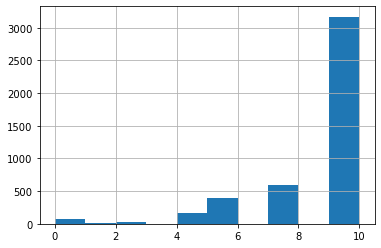

In [18]:
df_new['NOTE'].hist()

In [20]:
df_new['NOTE'].mean()

8.71497856981728

In [9]:
np.unique(df_new['NOTE'])

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  4.5,  5. ,  5.5,  6. ,  7. ,
        7.5,  8. , 10. ])

<AxesSubplot:>

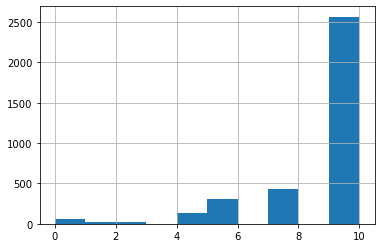

In [21]:
df_new['NOTE'].iloc[:train_test_split_id].hist()

<AxesSubplot:>

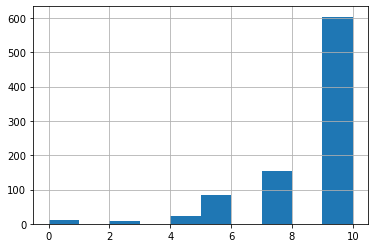

In [23]:
df_new['NOTE'].iloc[train_test_split_id:].hist()

In [26]:
mask = df_new['NOTE'] >= 7
df_new[mask].mean()

NOTE                       9.556634
Nb_Arrachement_pelade      9.627493
Moy_Arrachement_pelade     0.053700
Nb_Faiencage               1.865727
Moy_Faiencage              0.013893
Nb_Nid_de_poule            0.902951
Moy_Nid_de_poule           0.006276
Nb_Transversale            9.559426
Moy_Transversale           0.063230
Nb_Longitudinale          16.943898
Moy_Longitudinale          0.093175
Nb_Reparation             13.218825
Moy_Reparation             0.051372
dtype: float64

In [27]:
mask = df_new['NOTE'] < 7
df_new[mask].mean()

NOTE                        4.004464
Nb_Arrachement_pelade      10.558036
Moy_Arrachement_pelade      0.070892
Nb_Faiencage               12.172619
Moy_Faiencage               0.078922
Nb_Nid_de_poule             1.540179
Moy_Nid_de_poule            0.012107
Nb_Transversale            50.505952
Moy_Transversale            0.273284
Nb_Longitudinale          117.520833
Moy_Longitudinale           0.446361
Nb_Reparation               5.563988
Moy_Reparation              0.036364
dtype: float64

In [19]:
col = ['Moy_Reparation', 'Moy_Longitudinale', 'Moy_Transversale',
       'Moy_Nid_de_poule', 'Moy_Faiencage', 'Moy_Arrachement_pelade',
      'NOTE']

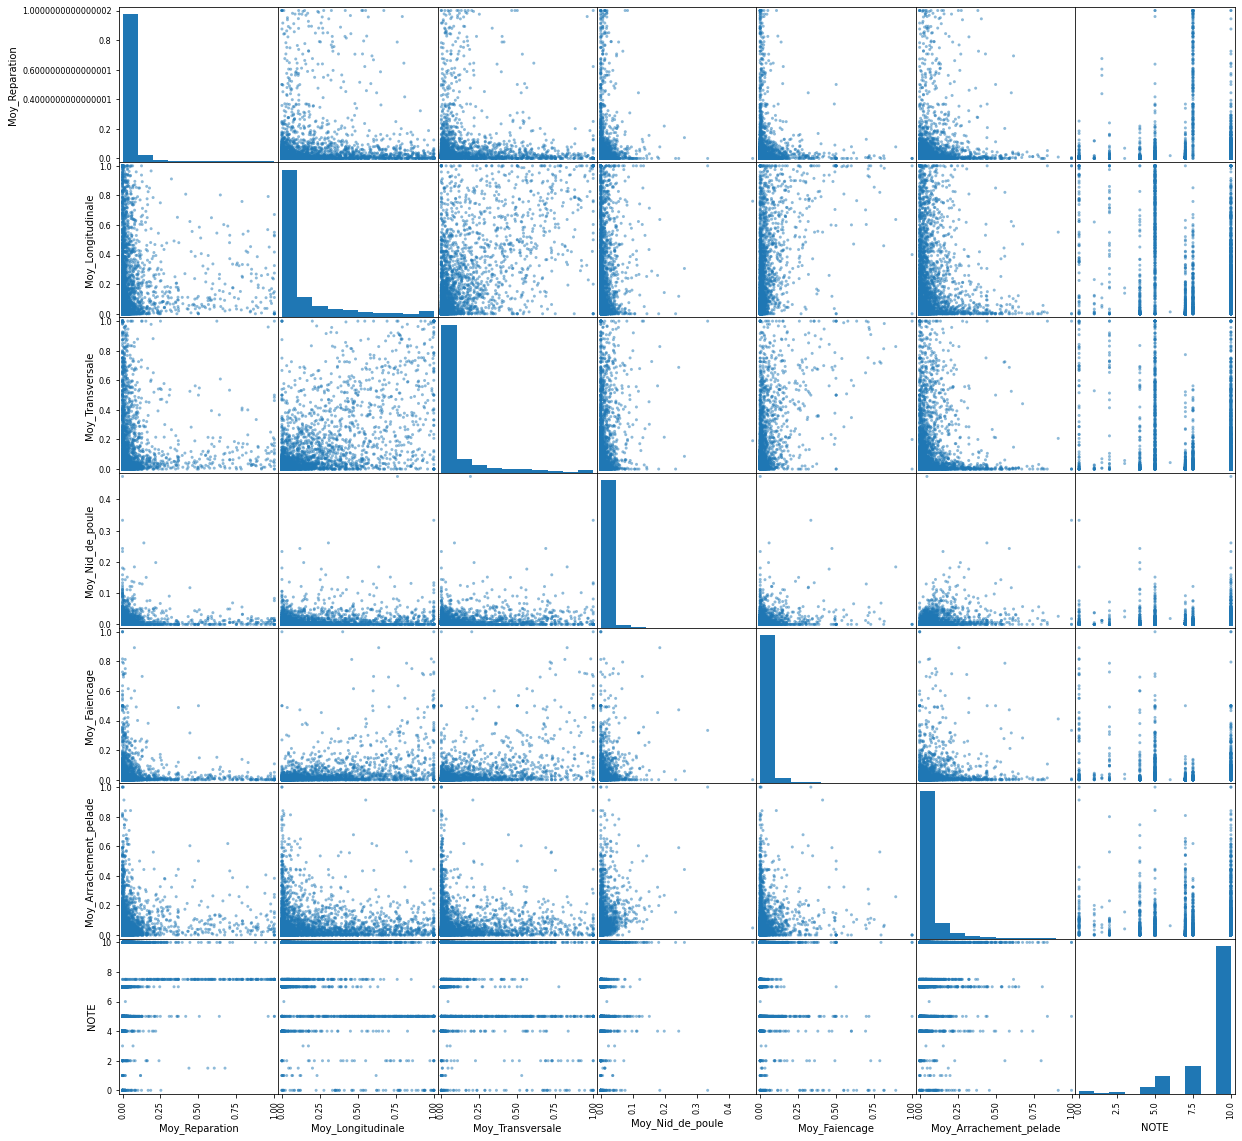

In [22]:
pl = pd.plotting.scatter_matrix(df_new[col], figsize=(20,20))